# Importation des données annotées

In [ ]:
#!pip uninstall keras_contrib

Found existing installation: keras-contrib 2.0.8
Uninstalling keras-contrib-2.0.8:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras_contrib-2.0.8.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras_contrib/*
Proceed (y/n)? y
  Successfully uninstalled keras-contrib-2.0.8


In [ ]:
#!git clone https://www.github.com/keras-team/keras-contrib.git

Cloning into 'keras-contrib'...
remote: Enumerating objects: 3634, done.
remote: Total 3634 (delta 0), reused 0 (delta 0), pack-reused 3634
Receiving objects: 100% (3634/3634), 861.24 KiB | 1.46 MiB/s, done.
Resolving deltas: 100% (2330/2330), done.


In [ ]:
#%cd keras-contrib

/content/keras-contrib/keras-contrib/keras-contrib


In [ ]:
#!python convert_to_tf_keras.py

Changed imports in 73 files.
Those files were found in the directory /content/keras-contrib/keras-contrib/keras-contrib


In [ ]:
#USE_TF_KERAS=1

#!python setup.py install

running install
running bdist_egg
running egg_info
creating keras_contrib.egg-info
writing keras_contrib.egg-info/PKG-INFO
writing dependency_links to keras_contrib.egg-info/dependency_links.txt
writing requirements to keras_contrib.egg-info/requires.txt
writing top-level names to keras_contrib.egg-info/top_level.txt
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/keras_contrib
copying keras_contrib/__init__.py -> build/lib/keras_contrib
creating build/lib/keras_contrib/preprocessing
copying keras_contrib/preprocessing/__init__.py -> build/lib/keras_contrib/preprocessing
creating build/lib/keras_contrib/callbacks
copying keras_contrib/callbacks/dead_relu_detector.py -> build/lib/keras_contrib/callbacks
copying keras_contrib/callbacks/cyclical_l

In [ ]:
!pip install tensorflow==2.2.0
!pip install keras==2.3.1
!pip install SentencePiece
!pip install transformers
!pip install git+https://www.github.com/keras-team/keras-contrib.git

     |████████████████████████████████| 516.2 MB 3.0 kB/s 
     |████████████████████████████████| 454 kB 57.3 MB/s 
     |████████████████████████████████| 3.0 MB 52.3 MB/s 
     |████████████████████████████████| 2.9 MB 56.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.0.0
    Uninstalli

     |████████████████████████████████| 377 kB 4.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 1.2.2
    Uninstalling Keras-1.2.2:
      Successfully uninstalled Keras-1.2.2


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ues4g6ra
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ues4g6ra


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root = '/content/drive/My Drive/PFE/'

In [ ]:
import json

with open(root + "fichierA.json", "r") as f:
  dataA = json.load(f)

In [ ]:
with open(root + "fichierB.json", "r") as f:
  dataB = json.load(f)

In [ ]:
with open(root + "fichierC.json", "r") as f:
  dataC = json.load(f)

In [ ]:
data = list(dataA.values()) + list(dataB.values()) + list(dataC.values())

In [ ]:
k = 5000

In [ ]:
import random

random.seed(27)
n = len(data)

sample = random.choices(list(range(n)), k = k)

In [ ]:
sample_data = [data[i] for i in sample]

In [ ]:
def prepare_address(dict_):

  address = [ dict_['data'].split(' ') ]
  annotation = []
  for tup in dict_['label']:

    annotation += [tup[2]]*(tup[1]-tup[0])
  
  annotation = [annotation]

  return (address, annotation)

In [ ]:
def fusion(tup1, tup2):

  return (tup1[0] + tup2[0], tup1[1] + tup2[1])

In [ ]:
from multiprocessing import Pool
from functools import reduce

In [ ]:
with Pool() as pool:
  mapping = pool.map(prepare_address, sample_data)

In [ ]:
address, entity = reduce(fusion, mapping)

In [ ]:
tags = [tag for tag in set.union(*[set(i) for i in entity])]

In [ ]:
tags.append("PAD")
n_tags = len(tags)

In [ ]:
tags

['CODPOST', 'NUMVOIE', 'SUFF', 'LIBCOM', 'CPLADR', 'LIBVOIE', 'PAD']

In [ ]:
# maxlen = max([len(s) for s in address]) + 30
maxlen = 25

In [ ]:
entity[0]

['NUMVOIE',
 'LIBVOIE',
 'LIBVOIE',
 'LIBVOIE',
 'CODPOST',
 'LIBCOM',
 'LIBCOM',
 'LIBCOM']

In [ ]:
import numpy as np

y = np.zeros((k, maxlen), dtype = np.int32)

for i, ents in enumerate(entity):
  y[i] =  [ tags.index(j) for j in ents] + [n_tags - 1]*(maxlen - len(ents))

In [ ]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=n_tags)

In [ ]:
y.shape

(5000, 25, 7)

In [ ]:
from transformers import CamembertModel, CamembertTokenizer, CamembertConfig
import tensorflow as tf
import torch

In [ ]:
tokenizer = CamembertTokenizer.from_pretrained("camembert/camembert-large")
camembert = CamembertModel.from_pretrained("camembert/camembert-large")
camembert.eval(); # disable dropout (or leave in train mode to finetune)

Downloading:   0%|          | 0.00/790k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert/camembert-large were not used when initializing CamembertModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
X = np.zeros((k, maxlen, 1024 ))


for i, add in enumerate(address):
  
  encoded_address = tokenizer.encode(add)
  encoded_address = torch.tensor(encoded_address).unsqueeze(0)
  X[i][:len(add)] = camembert(encoded_address)[0].detach().numpy()[0][1:-1]

In [ ]:
add

['3', 'IMP', 'DU', 'VEY', '14610', 'CAIRON']

In [ ]:
camembert(encoded_address)[0].detach().numpy()[1:-1].shape

(0, 8, 1024)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(n_tags, activation="softmax")))
#input = Input(shape=(maxlen,1024))
#model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(input)
#out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

In [ ]:
#model = Model(input, out)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.build((None, maxlen, 1024))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 25, 200)           900000    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 25, 7)             1407      
Total params: 901,407
Trainable params: 901,407
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_test.shape

(1000, 25, 7)

In [ ]:
early = EarlyStopping( monitor='val_loss', patience = 2)
history=model.fit(X_train, y_train,  epochs=15, workers = 4, validation_data=(X_test, y_test), batch_size = 40, callbacks=[early])

Train on 4000 samples, validate on 1000 samples
Epoch 1/15
4000/4000 [==============================] - 13s 3ms/step - loss: 0.2351 - accuracy: 0.9352 - val_loss: 0.0934 - val_accuracy: 0.9670
Epoch 2/15
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0825 - accuracy: 0.9713 - val_loss: 0.0726 - val_accuracy: 0.9725
Epoch 3/15
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0676 - accuracy: 0.9757 - val_loss: 0.0673 - val_accuracy: 0.9753
Epoch 4/15
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0583 - accuracy: 0.9791 - val_loss: 0.0600 - val_accuracy: 0.9762
Epoch 5/15
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0530 - accuracy: 0.9804 - val_loss: 0.0615 - val_accuracy: 0.9762
Epoch 6/15
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0487 - accuracy: 0.9822 - val_loss: 0.0575 - val_accuracy: 0.9770
Epoch 7/15
4000/4000 [==============================] - 11s 3ms/step - loss: 0.046

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(30, 12), dpi=80)

  ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
  ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
  ax[0].grid(alpha=0.3)
  ax[0].title.set_text('Training Vs Validation Accuracy')
  ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
  plt.setp(ax[0], xlabel='Epochs')
  plt.setp(ax[0], ylabel='Accuracy')


  ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
  ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
  ax[1].grid(alpha=0.3)
  ax[1].title.set_text('Training Vs Validation Loss')
  ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
  plt.legend(['train', 'val'], loc='upper left')
  plt.setp(ax[1], xlabel='Epochs')
  plt.setp(ax[1], ylabel='Loss')

  plt.show()

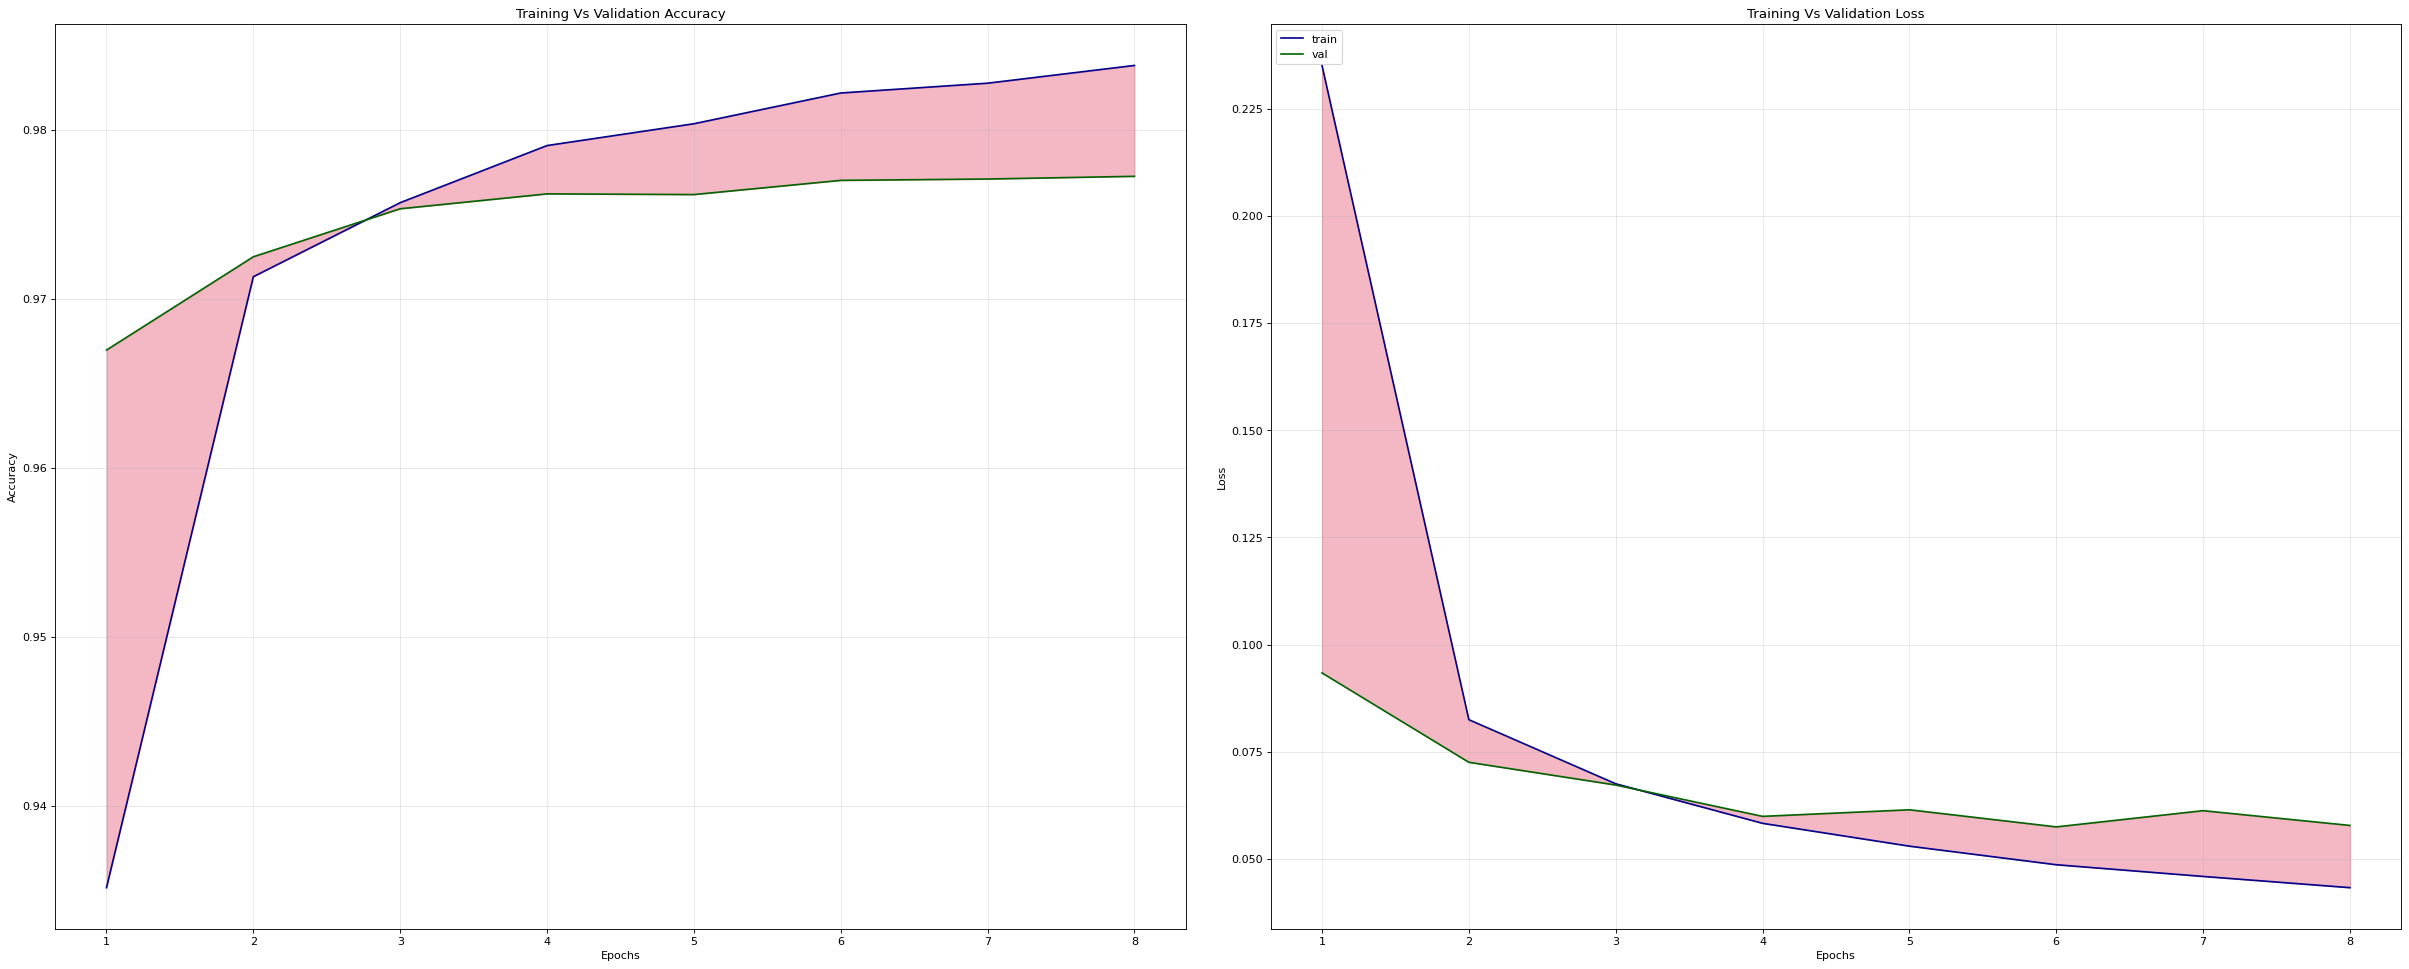

In [ ]:
plot_history(history)

In [ ]:
X_test[5:6].shape

(1, 25, 1024)

In [ ]:
test = np.zeros((1, maxlen, 1024 ))
word = "IL HABITE AU BAT A APPT 14 17 B SQUARE DES CLOTEAUX 35200 RENNES"
word = word.split(" ")
n = len(word)
token = tokenizer.encode(word)
token = torch.tensor(token).unsqueeze(0)
test[0][:n] = camembert(token)[0].detach().numpy()[0][1:-1]

In [ ]:
p = model.predict(test)
p = np.argmax(p, axis=-1)
print("{:14} ({:5}): {}".format("Word", "True", "Pred"))


for i in range(n):

    print("{:14}: {}".format(word[i],tags[p[0][i]]))

Word           (True ): Pred
BAT           : CPLADR
A             : CPLADR
APPT          : CPLADR
14            : CPLADR
17            : NUMVOIE
B             : SUFF
SQUARE        : LIBVOIE
DES           : LIBVOIE
CLOTEAUX      : LIBVOIE
35200         : CODPOST
RENNES        : LIBCOM


In [ ]:
test_pred = model.predict(X_test, verbose=1)

1000/1000 [==============================] - 1s 1ms/step


In [ ]:
y_test.shape

(1000, 25, 7)

In [ ]:
test_pred.shape

(1000, 25, 7)

In [ ]:
np.argmax(y_test, axis=-1)[0][:8]

array([1, 5, 5, 5, 0, 3, 6, 6])

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
def evaluation(gt, pred):

  true = np.argmax(gt, axis=-1)
  hat = np.argmax(pred, axis=-1)

  true = [ [tags[i] for i in elt if i != 6] for elt in true]
  hat = [[tags[k] for k in hat[i][:len(value)]] for i, value in enumerate(true)]
  true = [i for elt in true for i in elt]
  hat = [i for elt in hat for i in elt]

  return classification_report(true, hat)

In [ ]:
print(evaluation(y_test, test_pred))

              precision    recall  f1-score   support

     CODPOST       0.85      0.89      0.87      1000
      CPLADR       0.84      0.83      0.84       955
      LIBCOM       0.98      0.94      0.96      1759
     LIBVOIE       0.94      0.95      0.95      3236
     NUMVOIE       0.97      0.97      0.97       958
        SUFF       0.93      0.83      0.87        63

    accuracy                           0.93      7971
   macro avg       0.92      0.90      0.91      7971
weighted avg       0.93      0.93      0.93      7971



In [ ]:
from keras_contrib.layers import CRF
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy

In [ ]:
input = Input(shape=(maxlen, 1024))
model1 = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(input)
model1 = TimeDistributed(Dense(50, activation="tanh"))(model1)

crf = CRF(n_tags, learn_mode='marginal') 
#crf = CRF(n_tags) # CRF layer
out = crf(model1)  # output

In [ ]:
model1 = Model(input, out)
#model1.compile(optimizer="adam", loss=crf_loss, metrics=[crf_accuracy, "accuracy"])
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#model1.build((None, maxlen, 1024))
model1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 25, 1024)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 25, 200)           900000    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 25, 50)            10050     
_________________________________________________________________
crf_7 (CRF)                  (None, 25, 7)             420       
Total params: 910,470
Trainable params: 910,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early = EarlyStopping( monitor='val_loss', patience = 2)
history1=model1.fit(X_train, y_train,  epochs=15, workers = 4, validation_data=(X_test, y_test), batch_size = 40, callbacks=[early])

Train on 4000 samples, validate on 1000 samples
Epoch 1/15
4000/4000 [==============================] - 13s 3ms/step - loss: 0.2661 - accuracy: 0.9157 - val_loss: 0.0971 - val_accuracy: 0.9669
Epoch 2/15
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0880 - accuracy: 0.9685 - val_loss: 0.0759 - val_accuracy: 0.9726
Epoch 3/15
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0704 - accuracy: 0.9754 - val_loss: 0.0649 - val_accuracy: 0.9757
Epoch 4/15
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0603 - accuracy: 0.9783 - val_loss: 0.0658 - val_accuracy: 0.9755
Epoch 5/15
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0538 - accuracy: 0.9802 - val_loss: 0.0589 - val_accuracy: 0.9777
Epoch 6/15
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0488 - accuracy: 0.9822 - val_loss: 0.0602 - val_accuracy: 0.9768
Epoch 7/15
4000/4000 [==============================] - 12s 3ms/step - loss: 0.046

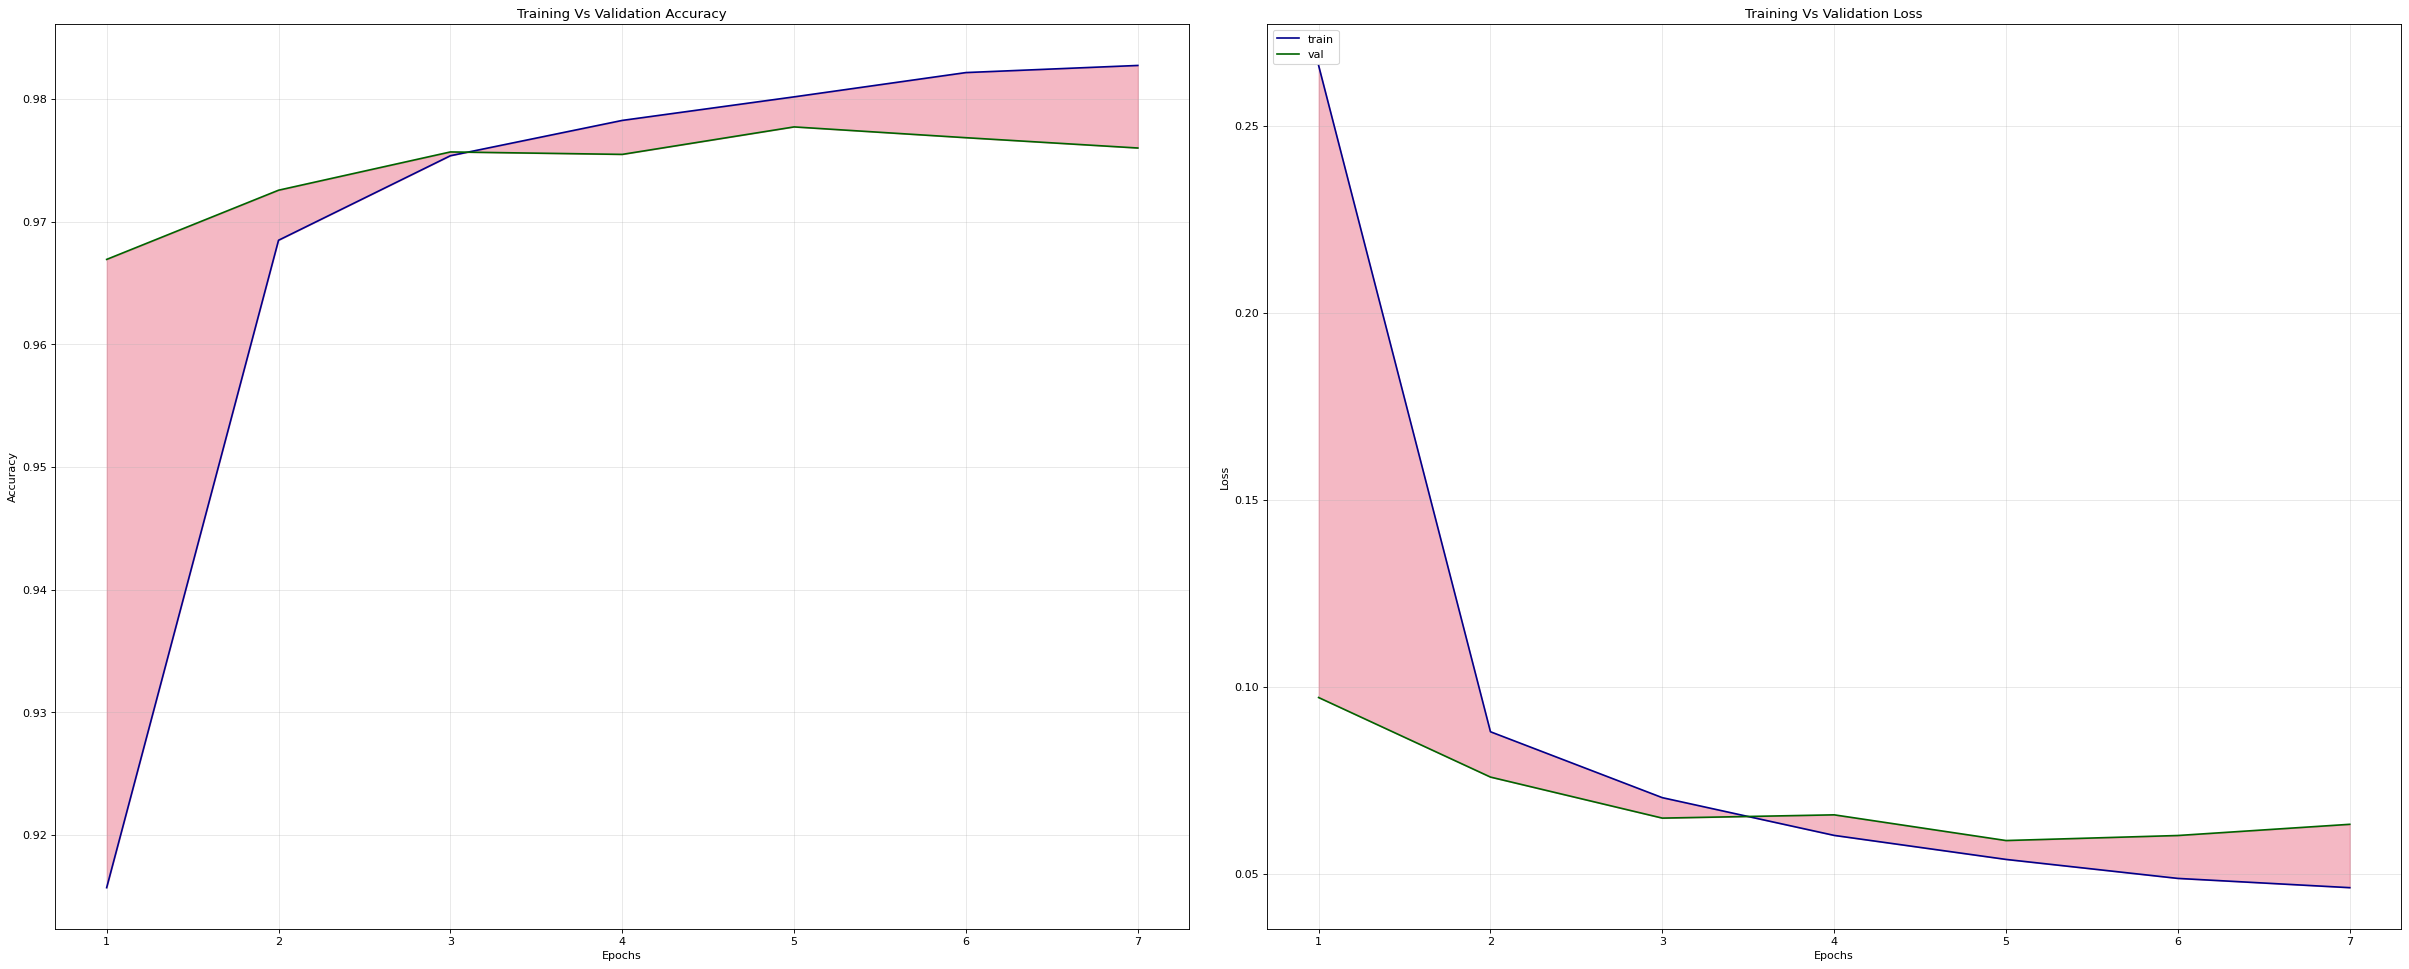

In [ ]:
plot_history(history1)

In [ ]:
test_pred1 = model1.predict(X_test, verbose=1)

1000/1000 [==============================] - 1s 1ms/step


In [ ]:
print(evaluation(y_test, test_pred1))

              precision    recall  f1-score   support

     CODPOST       0.87      0.86      0.87      1000
      CPLADR       0.76      0.91      0.83       955
      LIBCOM       0.96      0.96      0.96      1759
     LIBVOIE       0.97      0.92      0.94      3236
     NUMVOIE       0.97      0.97      0.97       958
        SUFF       0.93      0.83      0.87        63

    accuracy                           0.92      7971
   macro avg       0.91      0.91      0.91      7971
weighted avg       0.93      0.92      0.93      7971



In [ ]:
#!pip install keras-crf